<a href="https://colab.research.google.com/github/kimdesok/kimdesok.github.io/blob/main/Stock_daily_ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
import urllib
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from urllib.request import urlopen

In [2]:
#KOSPI code + stock name
stock_type = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt'
}

def get_code(df, names):
  codes = list()
  for name in names:
    code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
    code = code.strip()
    codes.append(code)
  return codes

def get_download_stock(market_type=None):
  market_type_param = stock_type[market_type]
  download_link = 'http://kind.krx.co.kr/corpgeneral/corpList.do'
  download_link = download_link + '?method=download'
  download_link = download_link + '&marketType=' + market_type_param

  df = pd.read_html(download_link, header=0)[0]
  return df;

def get_download_kospi():
  df = get_download_stock('kospi')
  df.종목코드 = df.종목코드.map('{:06d}'.format)
  return df

def get_download_kosdaq():
  df = get_download_stock('kosdaq')
  df.종목코드 = df.종목코드.map('{:06d}'.format)
  return df

kospi_df = get_download_kospi()
kosdaq_df = get_download_kosdaq()



In [3]:
code_df = pd.concat([kospi_df, kosdaq_df])
print(code_df.head())

code_df = code_df[['회사명', '종목코드']]

# data frame title 변경 '회사명' = name, 종목코드 = 'code'
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})


         회사명    종목코드           업종  ...      대표자명                    홈페이지     지역
0      DRB동일  004840     고무제품 제조업  ...       류영식     http://drbworld.com  부산광역시
1        DSR  155660  1차 비철금속 제조업  ...       홍석빈      http://www.dsr.com  부산광역시
2      GS글로벌  001250    상품 종합 도매업  ...       김태형  http://www.gsgcorp.com  서울특별시
3  HDC현대산업개발  294870       건물 건설업  ...  권순호, 정경구  http://www.hdc-dvp.com  서울특별시
4        KEC  092220      반도체 제조업  ...   박남규 김학남    http://www.kec.co.kr  서울특별시

[5 rows x 9 columns]


In [ ]:
!git clone "https://github.com/FinanceData/marcap.git" marcap

Cloning into 'marcap'...
remote: Enumerating objects: 945, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 945 (delta 48), reused 65 (delta 45), pack-reused 877
Receiving objects: 100% (945/945), 2.12 GiB | 41.54 MiB/s, done.
Resolving deltas: 100% (554/554), done.
Checking out files: 100% (39/39), done.


In [18]:
#!ls -lh marcap/data 
!cp -r marcap '/content/drive/MyDrive/marcap'

In [19]:
from marcap import marcap_data
from datetime import date
today = date.today()

#Select dates
start_date = '2018-01-01'
stock_data = marcap_data(start_date, today)
#print(stock_data[['Code', 'Name', 'Open', 'High', 'Low', 'Close', 'Volume']].tail(10))

#For this exercise, we need two dataframes
lng_df = stock_data[stock_data['Name'] == '피씨엘']
spy_df = stock_data[stock_data['Name'] == '이아이디']

#print(lng_df[['Code', 'Name', 'Open', 'High', 'Low', 'Close', 'Volume']])
#print(spy_df[['Code', 'Name', 'Open', 'High', 'Low', 'Close', 'Volume']])

print(lng_df.info())
print(spy_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 886 entries, 2018-01-02 to 2021-08-04
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         886 non-null    object 
 1   Name         886 non-null    object 
 2   Market       886 non-null    object 
 3   Dept         886 non-null    object 
 4   Close        886 non-null    int64  
 5   ChangeCode   886 non-null    object 
 6   Changes      886 non-null    int64  
 7   ChagesRatio  886 non-null    float64
 8   Open         886 non-null    int64  
 9   High         886 non-null    int64  
 10  Low          886 non-null    int64  
 11  Volume       886 non-null    int64  
 12  Amount       886 non-null    int64  
 13  Marcap       886 non-null    int64  
 14  Stocks       886 non-null    int64  
 15  MarketId     886 non-null    object 
 16  Rank         886 non-null    int64  
dtypes: float64(1), int64(10), object(6)
memory usage: 124.6+ KB
None
<class '

In [20]:
#Data transform using the close price
#price_data = stock_data.pivot_table(index='Date', columns='Code', values=['Close', 'Volume'])
lng_df = lng_df.pivot_table(index='Date', values=['Close', 'Volume'])
lng_df.columns = ['Adj_Close', 'Adj_Volume']
print(lng_df.tail())
spy_df = spy_df.pivot_table(index='Date', values=['Close', 'Volume'])
spy_df.columns = ['Adj_Close', 'Adj_Volume']
print(spy_df.tail())

            Adj_Close  Adj_Volume
Date                             
2021-07-29      54900     1233905
2021-07-30      51700      351393
2021-08-02      49100      112441
2021-08-03      47900       96858
2021-08-04      49900      190980
            Adj_Close  Adj_Volume
Date                             
2021-07-29        542    14316823
2021-07-30        530    20461810
2021-08-02        538    23267012
2021-08-03        516    24302227
2021-08-04        527    49134545


In [8]:
#한글 폰트 지정
plt.rc('font', family='NanumBarunGothic') 

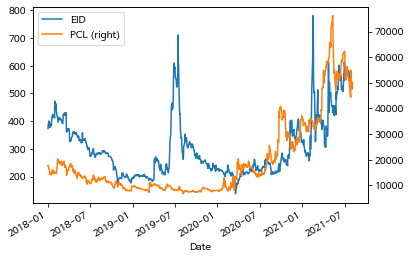

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


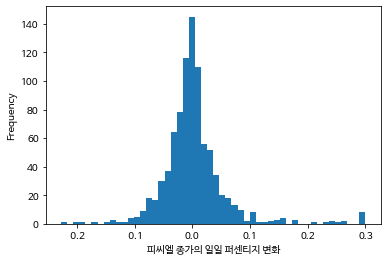

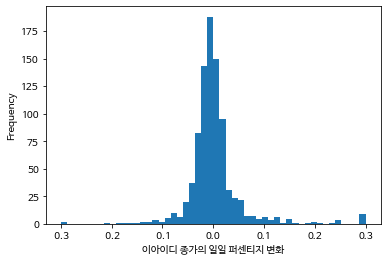

<Figure size 432x288 with 0 Axes>

In [21]:
spy_df['Adj_Close'].plot(label='EID', legend=True)
lng_df['Adj_Close'].plot(label="PCL", legend=True, secondary_y=True)
#plt.ylabel('피씨엘 종가')
plt.show()  # show the plot


# Histogram of the daily price change percent of Adj_Close for LNG
lng_df['Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('피씨엘 종가의 일일 퍼센티지 변화')
plt.show()

spy_df['Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('이아이디 종가의 일일 퍼센티지 변화')
plt.show()

plt.clf()  # clear the plot space

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.026268
5d_close_future_pct     -0.026268             1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


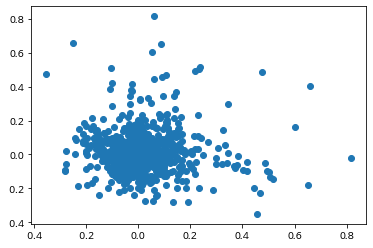

In [22]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
lng_df['5d_future_close'] = lng_df['Adj_Close'].shift(-5)
lng_df['5d_close_future_pct'] = lng_df['5d_future_close'].pct_change(5)
lng_df['5d_close_pct'] = lng_df['Adj_Close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = lng_df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(lng_df['5d_close_pct'], lng_df['5d_close_future_pct'])
plt.show()

In [ ]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    lng_df['ma' + str(n)] = talib.SMA(lng_df['Adj_Close'].values,
                              timeperiod=n) / lng_df['Adj_Close']
    # Create the RSI indicator
    lng_df['rsi' + str(n)] = talib.RSI(lng_df['Adj_Close'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

print(feature_names)